In [35]:
# simple returns
# EP - BP / BP - multiple assets over the same timeframe
# EP / BP - 1

# EP / BG - single asset

# deviation
# daily_returns.std() * 250**0.5

In [ ]:
import datetime as dt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from scipy.stats import norm


ticker = "PG"

data = yf.download(ticker, start="2007-01-01", end="2017-01-01")["Close"]
data

/var/folders/9t/pmjxxbqs3j19rnf8hr5qxzvm0000gn/T/ipykernel_34142/2842964023.py:11: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start='2007-01-01', end='2017-01-01')['Close']
[*********************100%***********************]  1 of 1 completed


Ticker,PG
Date,
2007-01-03,37.885487
2007-01-04,37.597878
2007-01-05,37.275005
2007-01-08,37.357197
2007-01-09,37.263271
...,...
2016-12-23,67.119514
2016-12-27,66.835114
2016-12-28,66.416420


In [37]:
log_returns = np.log(1 + data.pct_change()).dropna()
log_returns

Ticker,PG
Date,
2007-01-04,-0.007621
2007-01-05,-0.008625
2007-01-08,0.002203
2007-01-09,-0.002517
2007-01-10,0.011901
...,...
2016-12-23,0.005784
2016-12-27,-0.004246
2016-12-28,-0.006284


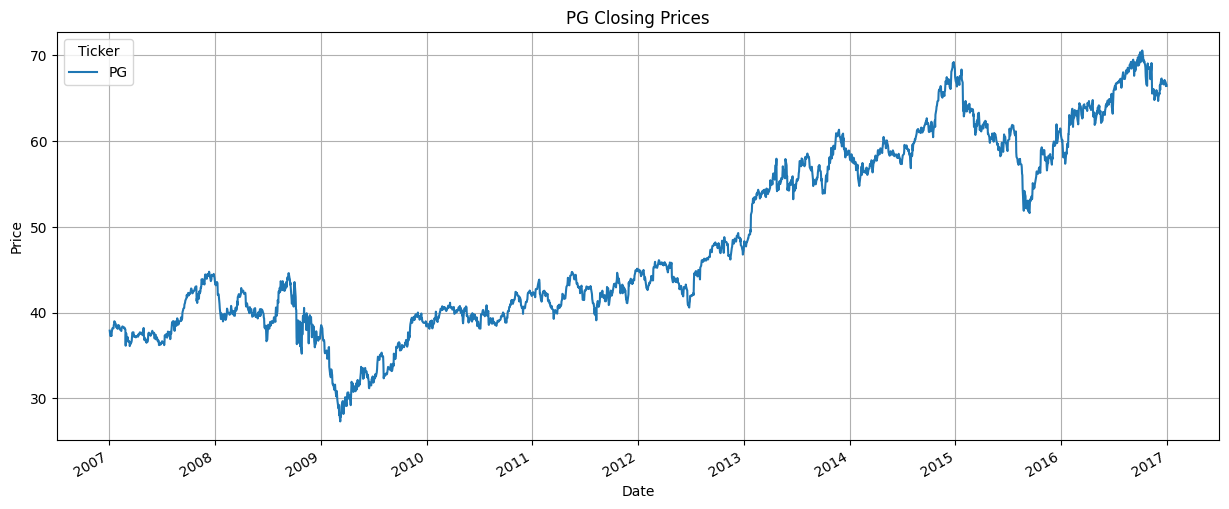

In [38]:
data.plot(figsize=(15, 6))
plt.title(f"{ticker} Closing Prices")
plt.xlabel("Date")
plt.ylabel("Price")
plt.grid()
plt.show()

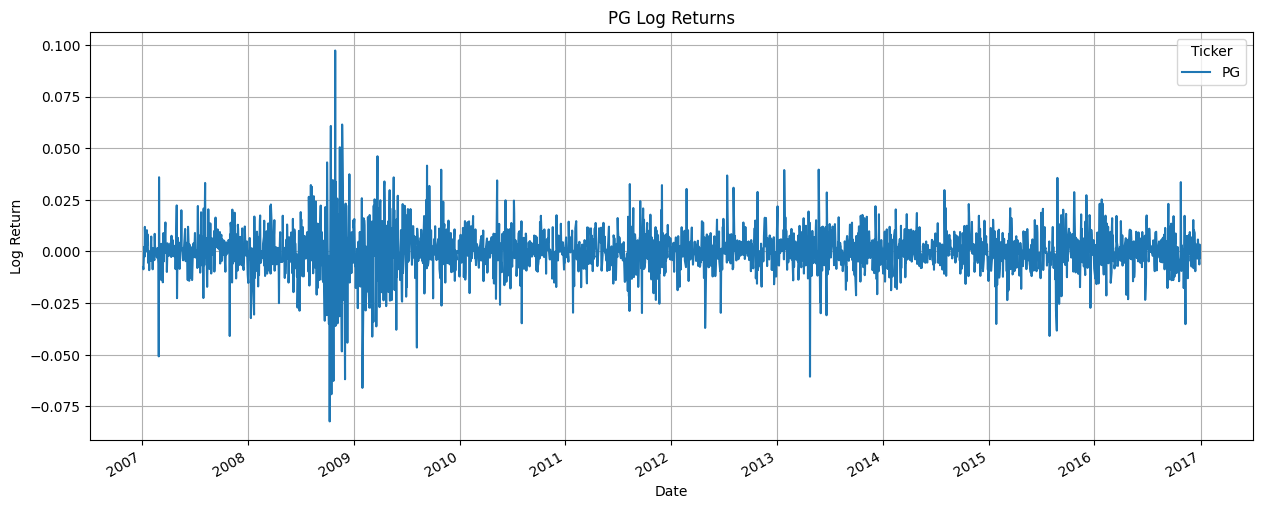

In [39]:
log_returns.plot(figsize=(15, 6))
plt.title(f"{ticker} Log Returns")
plt.xlabel("Date")
plt.ylabel("Log Return")
plt.grid()
plt.show()

In [40]:
u = log_returns.mean()
u

Ticker
PG    0.000223
dtype: float64

In [41]:
var = log_returns.var()
var

Ticker
PG    0.000126
dtype: float64

In [42]:
drift = u - (0.5 * var)
drift

Ticker
PG    0.00016
dtype: float64

In [43]:
stdev = log_returns.std()
stdev

Ticker
PG    0.01122
dtype: float64

In [44]:
type(stdev)

pandas.core.series.Series

In [45]:
drift.values

array([0.00016014])

In [46]:
stdev.values

array([0.01121957])

In [47]:
norm.ppf(0.95)

np.float64(1.644853626951472)

In [48]:
x = np.random.rand(10, 2)
x

array([[0.21377727, 0.60300977],
       [0.35731248, 0.22726936],
       [0.96513334, 0.66266436],
       [0.89037695, 0.55297912],
       [0.95401959, 0.46300514],
       [0.59428293, 0.15157137],
       [0.18819643, 0.29385418],
       [0.94633651, 0.07975657],
       [0.25529343, 0.71292801],
       [0.74184069, 0.93021057]])

In [49]:
norm.ppf(x)

array([[-0.7933833 ,  0.2611453 ],
       [-0.36565173, -0.74786976],
       [ 1.81363895,  0.41974564],
       [ 1.22853525,  0.13319172],
       [ 1.68514384, -0.09286567],
       [ 0.2385763 , -1.02971728],
       [-0.88456209, -0.54215989],
       [ 1.61032475, -1.40671085],
       [-0.65792416,  0.56195897],
       [ 0.64903058,  1.47736115]])

In [50]:
Z = norm.ppf(np.random.rand(10, 2))
Z

array([[-0.4373335 , -0.92749501],
       [ 0.90142722,  0.8133664 ],
       [-0.45275335,  1.48975365],
       [-0.18315602, -1.26772433],
       [ 0.79319129, -0.37696688],
       [-0.11513921, -0.38271713],
       [ 0.22713626, -0.52442752],
       [ 0.40525819, -1.96941608],
       [-0.2682852 , -0.65137854],
       [ 0.00479812,  0.50514189]])

In [51]:
t_intervals = 1000
iterations = 10

In [52]:
daily_returns = np.exp(
    drift.values + stdev.values * norm.ppf(np.random.rand(t_intervals, iterations))
)

daily_returns

array([[1.01097689, 0.99883205, 1.01839835, ..., 0.99123355, 1.00693506,
        1.01213469],
       [0.99552355, 0.98631345, 1.00495536, ..., 1.0084974 , 0.97783936,
        0.98732559],
       [1.01615229, 1.01890876, 0.99210234, ..., 0.99984759, 0.99333609,
        0.99568995],
       ...,
       [0.99397477, 1.03016727, 1.00725539, ..., 1.00446339, 0.98568621,
        1.02088238],
       [0.9839356 , 1.0123857 , 1.00510341, ..., 0.99861801, 1.00659126,
        0.99322082],
       [0.99085298, 1.01665394, 1.02042987, ..., 0.99878546, 1.00066674,
        1.0101007 ]], shape=(1000, 10))

In [ ]:
S0 = data.iloc[-1]  
S0

Ticker
PG    66.424294
Name: 2016-12-30 00:00:00, dtype: float64

In [54]:
price_list = np.zeros_like(daily_returns)
price_list

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], shape=(1000, 10))

In [55]:
price_list[0] = S0
price_list

array([[66.42429352, 66.42429352, 66.42429352, ..., 66.42429352,
        66.42429352, 66.42429352],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ]], shape=(1000, 10))

In [56]:
for t in range(1, t_intervals):
    price_list[t] = price_list[t - 1] * daily_returns[t]

price_list

array([[ 66.42429352,  66.42429352,  66.42429352, ...,  66.42429352,
         66.42429352,  66.42429352],
       [ 66.12694817,  65.51517409,  66.75344984, ...,  66.98872705,
         64.95228842,  65.58240461],
       [ 67.1950501 ,  66.7539848 ,  66.2262537 , ...,  66.97851742,
         64.5194523 ,  65.29974113],
       ...,
       [ 60.57692317, 156.41259176,  86.90608169, ..., 164.35833561,
         96.45064593,  58.33415279],
       [ 59.6037911 , 158.34987189,  87.34959911, ..., 164.13119437,
         97.08637716,  57.93869495],
       [ 59.05859414, 160.98702059,  89.13413987, ..., 163.93185037,
         97.15110896,  58.52391623]], shape=(1000, 10))

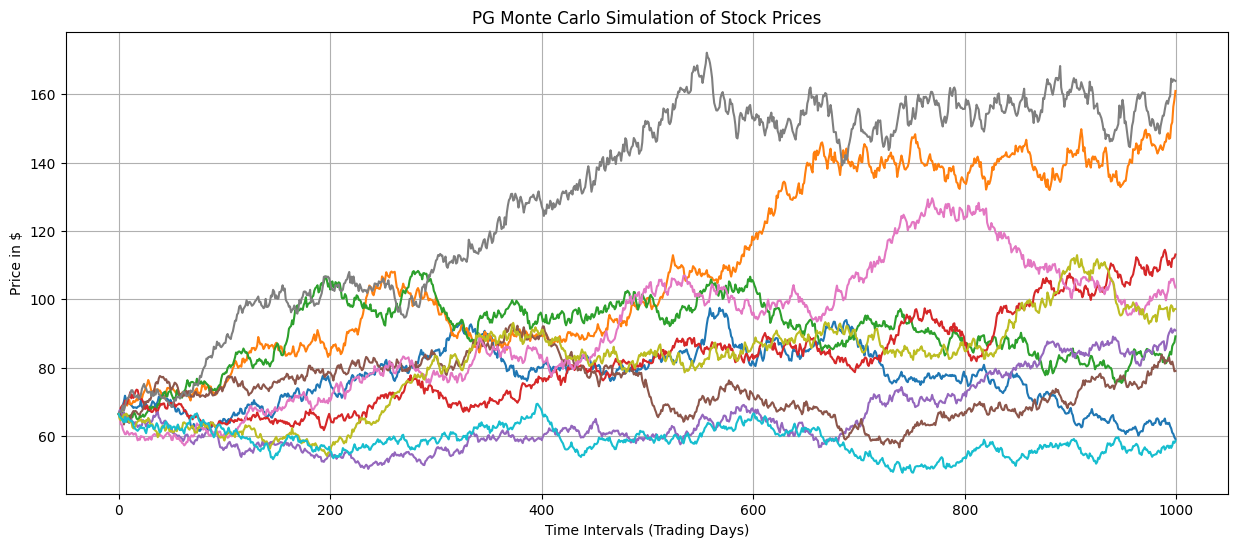

In [59]:
plt.figure(figsize=(15, 6))
plt.plot(price_list)
plt.title(f"{ticker} Monte Carlo Simulation of Stock Prices")
plt.xlabel("Time Intervals (Trading Days)")
plt.ylabel("Price in $")
plt.grid()
plt.show()